# Loss landscape curve quality relation to network depth

Below are the results of tests measuring the quality of the mode-connecting curves found by the algorithm proposed by Garipov et al. (2018). The main purpose of these tests was to check how the quality of the curves change depending on the depth/parametrization of the network.

The tests were conducted on the Pre-Activation version of the popular ResNet architecture with these numbers of layers:
- 2
- 56
- 110
- 164
- 218

All training has been done on the CIFAR10 dataset with 200 epochs and 0.0001 WD. LR was 0.1 for curve endpoints training and 0.03 for curve finding. Batch size was 64. The curve model was Bezier with 3 bends. The found curves were evaluated on 30 points.

Total time of training + evaluatiuon was about 80 hours using NVidia RTX 3060 (I've tried running in on the cloud but the affordable GPU models were consistently slower than my local setup).

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
CURVE_STATS_DIR = "curve_eval"
CURVE_STATS_FILE = "curve.npz"

PRERESNET_DEPTHS = [
    2,
    56,
    110,
    164,
    218,
]

PRERESNET_CURVE_STATS_PATHS = [
    Path(f"./results_preresnet_{depth}_cifar10") / CURVE_STATS_DIR / CURVE_STATS_FILE 
    for depth 
    in PRERESNET_DEPTHS
]

In [18]:
preresnet_curve_stats = {depth: np.load(path) for depth, path in zip(PRERESNET_DEPTHS, PRERESNET_CURVE_STATS_PATHS)}

Below are the actual diagrams with the results.

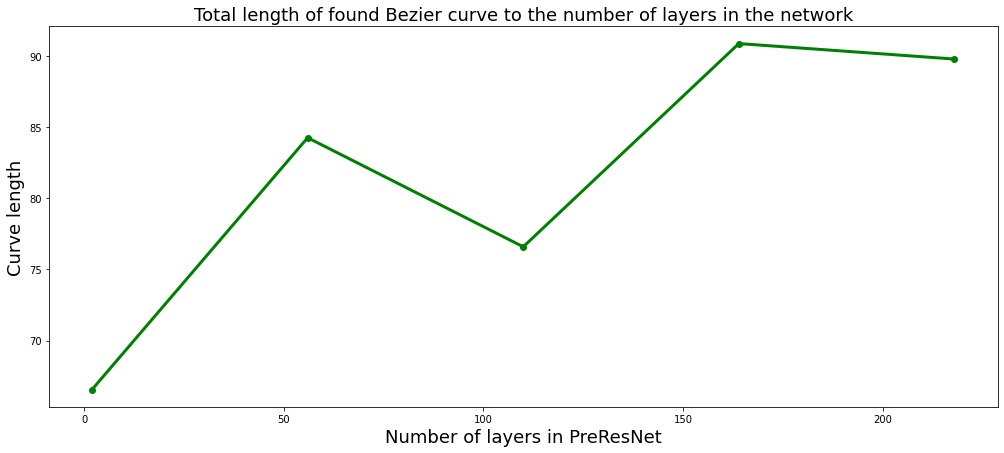

In [29]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [np.sum(stats['dl']) for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Curve length', fontsize=18)  
plt.title("Total length of found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

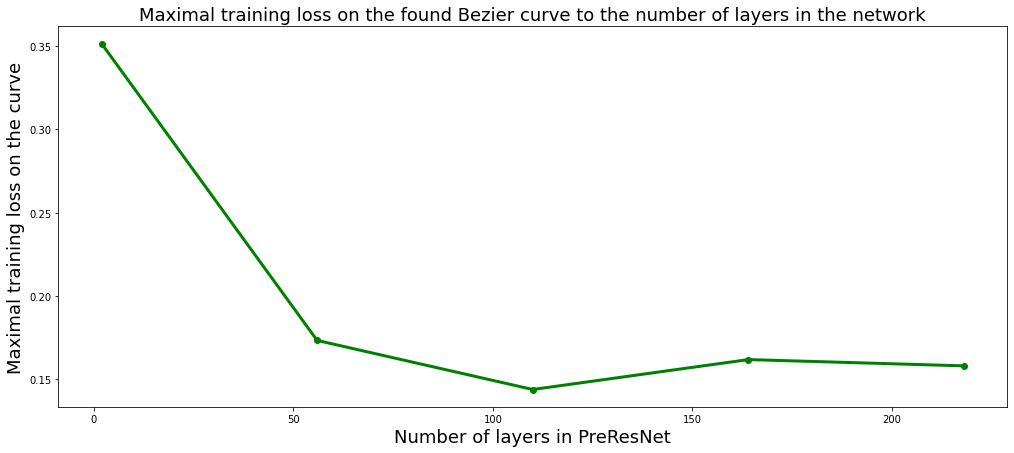

In [32]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_loss_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal training loss on the curve', fontsize=18)  
plt.title("Maximal training loss on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

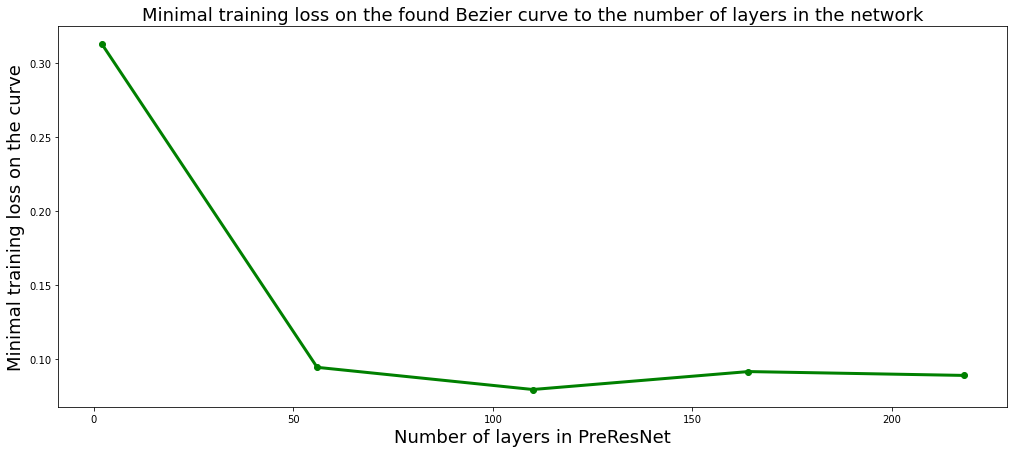

In [33]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_loss_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal training loss on the curve', fontsize=18)  
plt.title("Minimal training loss on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

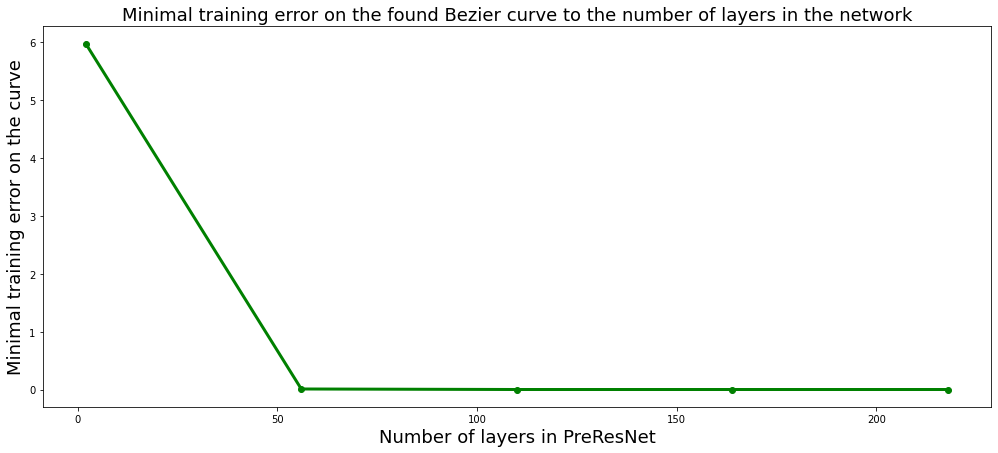

In [34]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_err_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal training error on the curve', fontsize=18)  
plt.title("Minimal training error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

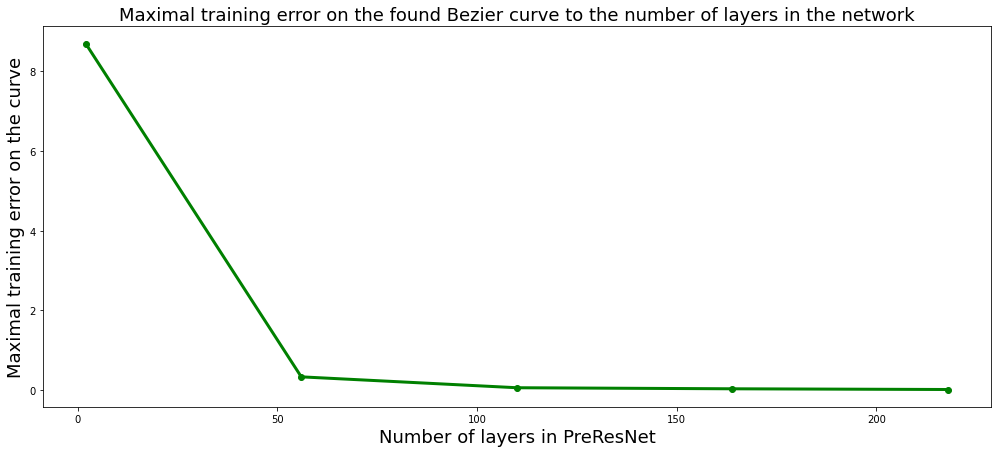

In [35]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_err_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal training error on the curve', fontsize=18)  
plt.title("Maximal training error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

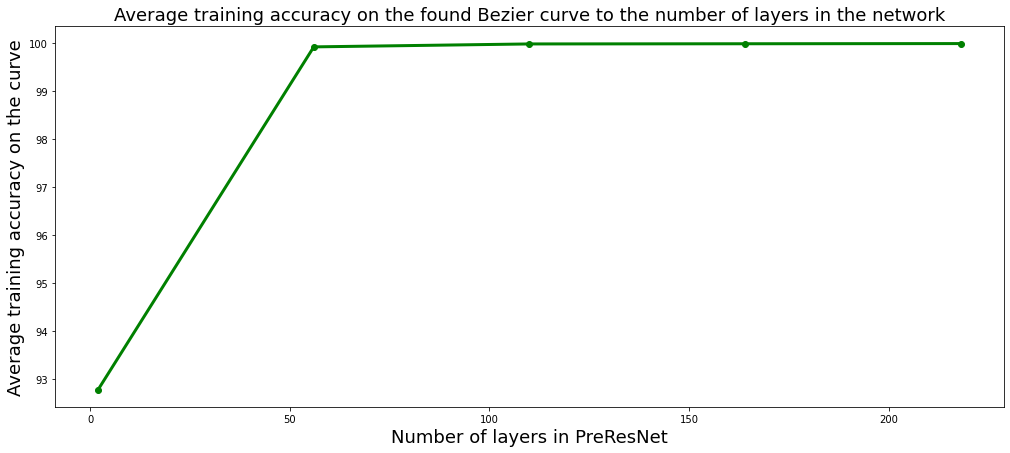

In [38]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [np.mean(stats['tr_acc']) for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Average training accuracy on the curve', fontsize=18)  
plt.title("Average training accuracy on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

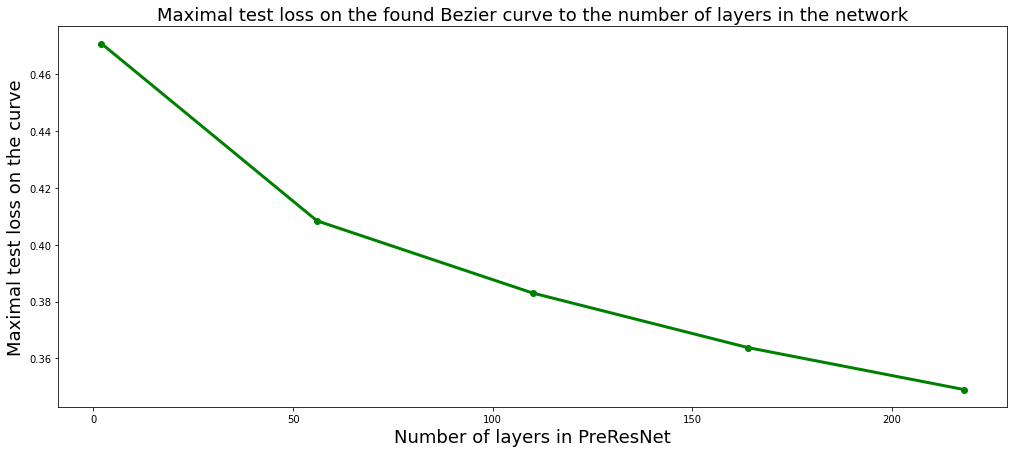

In [39]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_loss_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal test loss on the curve', fontsize=18)  
plt.title("Maximal test loss on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

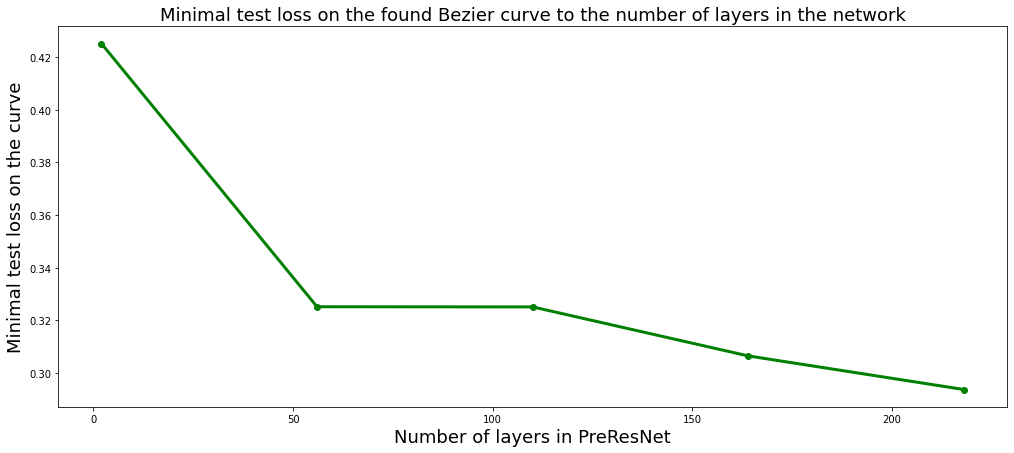

In [40]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_loss_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal test loss on the curve', fontsize=18)  
plt.title("Minimal test loss on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

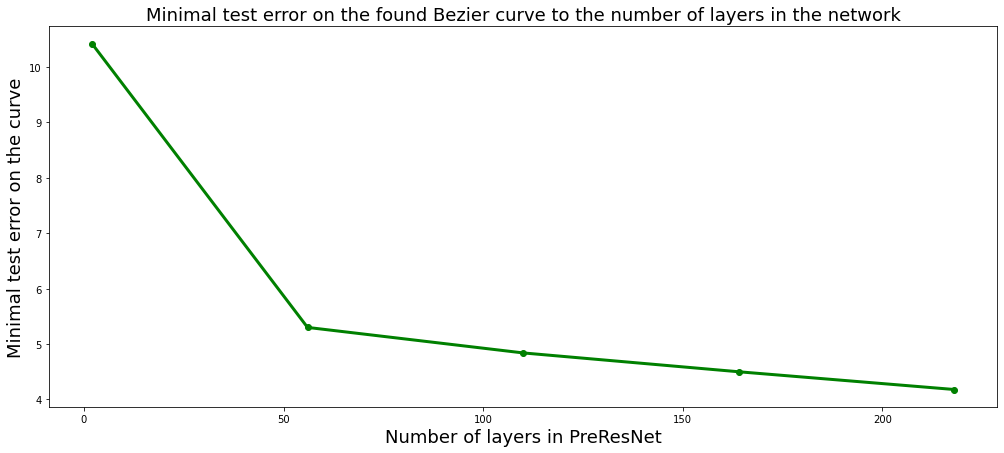

In [41]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_err_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal test error on the curve', fontsize=18)  
plt.title("Minimal test error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

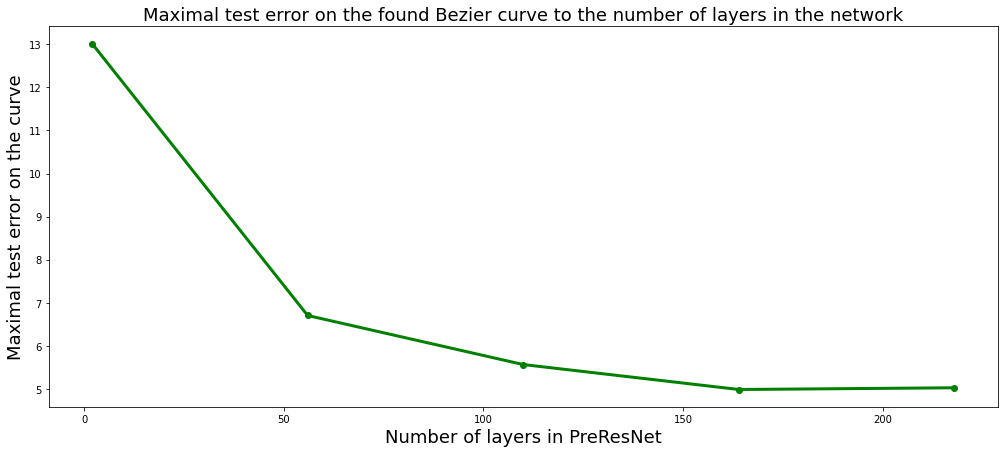

In [42]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_err_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal test error on the curve', fontsize=18)  
plt.title("Maximal test error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()

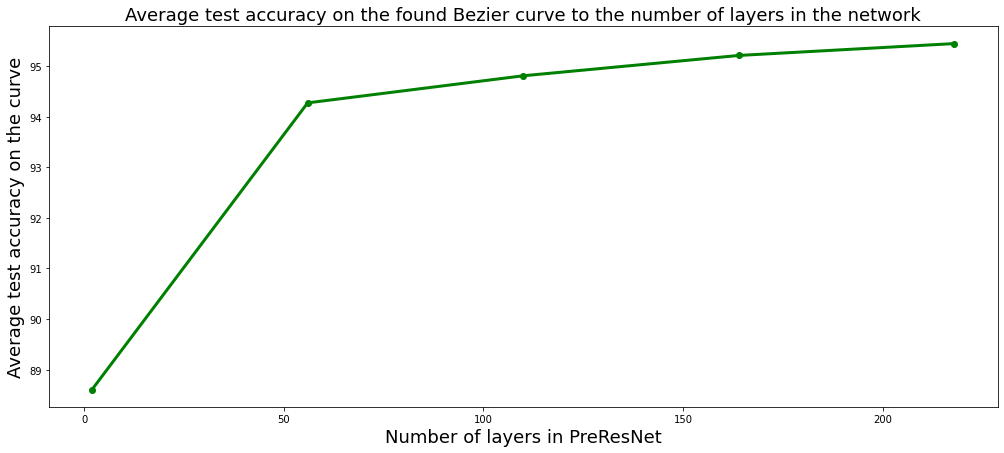

In [43]:
plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [np.mean(stats['te_acc']) for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Average test accuracy on the curve', fontsize=18)  
plt.title("Average test accuracy on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()